In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [116]:
data = pd.read_csv('SAHIE.csv')

In [117]:
data.head()

,Age Category,Income Category,Race Category,Sex Category,Year,ID,Name,Demographic Group: Number,Demographic Group: MOE,Uninsured: Number,Uninsured: MOE,Uninsured: %,Uninsured: %MOE,Insured: Number,Insured: MOE,Insured: %,Insured: %MOE
0,Under 65 years,All Incomes,All Races,Both Sexes,2020,1000,Alabama,"3,898,732",0.0,"460,936","15,207",11.8,0.4,"3,437,796","15,207",88.2,0.4
1,Under 65 years,All Incomes,All Races,Both Sexes,2020,1001,"Autauga County, AL","46,423",0.0,"4,902",625,10.6,1.3,"41,521",625,89.4,1.3
2,Under 65 years,All Incomes,All Races,Both Sexes,2020,1003,"Baldwin County, AL","178,310",0.0,"19,391","2,090",10.9,1.2,"158,919","2,090",89.1,1.2
3,Under 65 years,All Incomes,All Races,Both Sexes,2020,1005,"Barbour County, AL","16,265",0.0,"2,337",310,14.4,1.9,"13,928",310,85.6,1.9
4,Under 65 years,All Incomes,All Races,Both Sexes,2020,1007,"Bibb County, AL","16,121",0.0,"2,097",282,13.0,1.7,"14,024",282,87.0,1.7


In [120]:
#understanding categorical values -- answer is that columns are not adding any context (1 value per column)
print(pd.value_counts(data['Age Category']), pd.value_counts(data['Income Category']), 
      pd.value_counts(data['Race Category']), pd.value_counts(data['Sex Category']))

Under 65 years    3194
Name: Age Category, dtype: int64 All Incomes    3194
Name: Income Category, dtype: int64 All Races    3194
Name: Race Category, dtype: int64 Both Sexes    3194
Name: Sex Category, dtype: int64


In [121]:
#understanding column values
round(data.describe())

,Year,ID,Demographic Group: MOE,Uninsured: %,Uninsured: %MOE,Insured: %,Insured: %MOE
count,3194.0,3194.0,3193.0,3193.0,3193.0,3193.0,3193.0
mean,2020.0,30352.0,0.0,12.0,1.0,88.0,1.0
std,0.0,15178.0,0.0,5.0,1.0,5.0,1.0
min,2020.0,1000.0,0.0,2.0,0.0,59.0,0.0
25%,2020.0,18172.0,0.0,8.0,1.0,85.0,1.0
50%,2020.0,29174.0,0.0,11.0,1.0,89.0,1.0
75%,2020.0,45074.0,0.0,15.0,2.0,92.0,2.0
max,2020.0,56045.0,0.0,41.0,4.0,98.0,4.0


In [122]:
#Separating US States from County in dataframe and dropping overall state rows
data
data1 = data
data1['County'] = data1['Name'].str.split(',').str[0]
data1['County'] = data1['County'].str[:-7]
data1['State'] = data1['Name'].str.split(',').str[1]
data1 = data1[data1['State'].notna()]
data1.head()

,Age Category,Income Category,Race Category,Sex Category,Year,ID,Name,Demographic Group: Number,Demographic Group: MOE,Uninsured: Number,Uninsured: MOE,Uninsured: %,Uninsured: %MOE,Insured: Number,Insured: MOE,Insured: %,Insured: %MOE,County,State
1,Under 65 years,All Incomes,All Races,Both Sexes,2020,1001,"Autauga County, AL","46,423",0.0,"4,902",625,10.6,1.3,"41,521",625,89.4,1.3,Autauga,AL
2,Under 65 years,All Incomes,All Races,Both Sexes,2020,1003,"Baldwin County, AL","178,310",0.0,"19,391","2,090",10.9,1.2,"158,919","2,090",89.1,1.2,Baldwin,AL
3,Under 65 years,All Incomes,All Races,Both Sexes,2020,1005,"Barbour County, AL","16,265",0.0,"2,337",310,14.4,1.9,"13,928",310,85.6,1.9,Barbour,AL
4,Under 65 years,All Incomes,All Races,Both Sexes,2020,1007,"Bibb County, AL","16,121",0.0,"2,097",282,13.0,1.7,"14,024",282,87.0,1.7,Bibb,AL
5,Under 65 years,All Incomes,All Races,Both Sexes,2020,1009,"Blount County, AL","46,444",0.0,"6,156",701,13.3,1.5,"40,288",701,86.7,1.5,Blount,AL


In [123]:
#Selecting relevant columns
data2 = data1.iloc[:,[5,17,18,6,7,9,11]]
data2

,ID,County,State,Name,Demographic Group: Number,Uninsured: Number,Uninsured: %
1,1001,Autauga,AL,"Autauga County, AL","46,423","4,902",10.6
2,1003,Baldwin,AL,"Baldwin County, AL","178,310","19,391",10.9
3,1005,Barbour,AL,"Barbour County, AL","16,265","2,337",14.4
4,1007,Bibb,AL,"Bibb County, AL","16,121","2,097",13.0
5,1009,Blount,AL,"Blount County, AL","46,444","6,156",13.3
...,...,...,...,...,...,...,...
3189,56037,Sweetwater,WY,"Sweetwater County, WY","36,242","5,003",13.8
3190,56039,Teton,WY,"Teton County, WY","19,893","2,886",14.5
3191,56041,Uinta,WY,"Uinta County, WY","16,872","2,344",13.9
3192,56043,Washakie,WY,"Washakie County, WY","5,816",924,15.9


<AxesSubplot:xlabel='State', ylabel='Uninsured: %'>

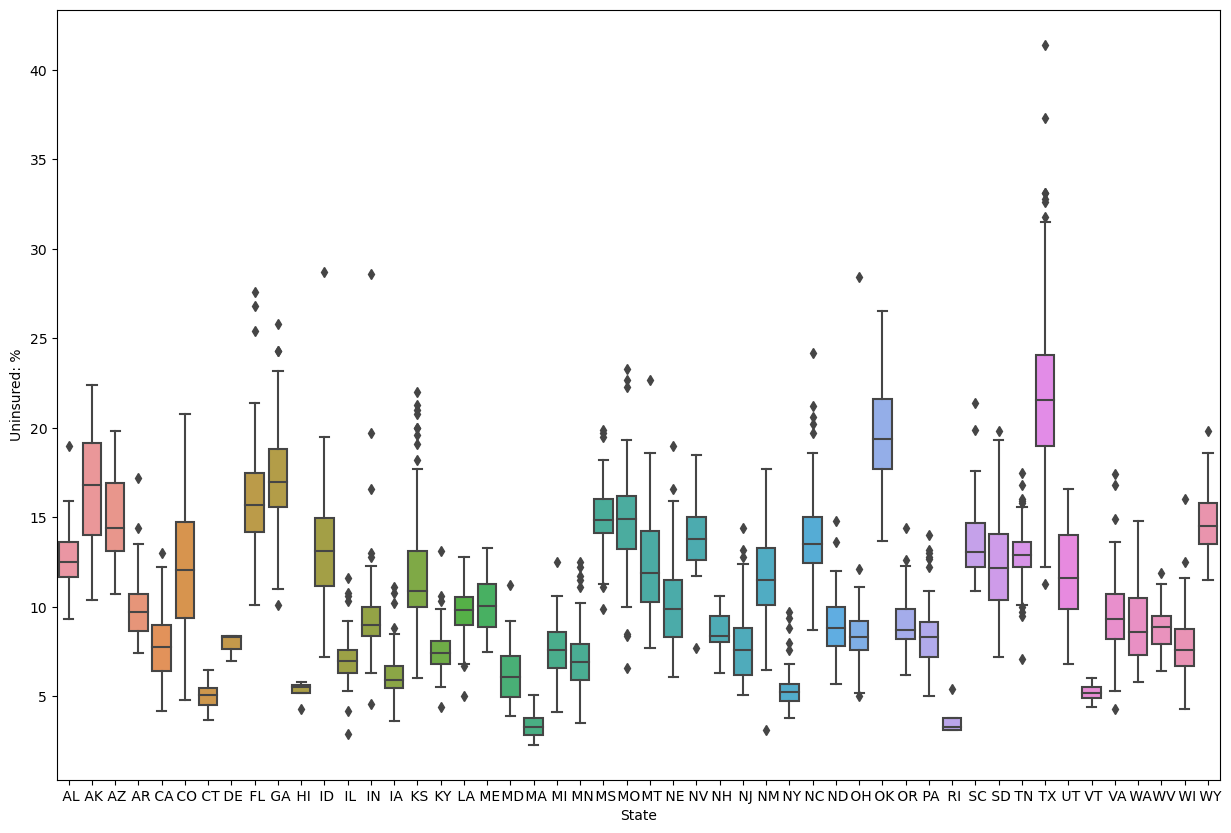

In [124]:
#boxploting median county uninsured percentage by state
fig, ax = plt.subplots(figsize=(15, 10))  # generate a figure and return figure and axis handle

sns.boxplot(x=data2['State'],y=data2['Uninsured: %'], ax=ax)

In [125]:
#Generating median list to sort boxplot
data_uni = data2.groupby('State')['Uninsured: %'].median()
data_uni1 = data_uni.sort_values(ascending=False)
data_uni1

State
 TX    21.55
 OK    19.40
 GA    17.00
 AK    16.80
 FL    15.70
 MO    14.90
 MS    14.85
 WY    14.50
 AZ    14.40
 NV    13.80
 NC    13.50
 ID    13.10
 SC    13.05
 TN    12.90
 AL    12.50
 SD    12.15
 CO    12.05
 MT    11.90
 UT    11.60
 NM    11.50
 KS    10.90
 ME    10.05
 NE     9.90
 LA     9.80
 AR     9.70
 VA     9.30
 IN     9.00
 WV     8.90
 ND     8.80
 OR     8.70
 WA     8.60
 NH     8.40
 DE     8.30
 OH     8.30
 PA     8.30
 CA     7.75
 MI     7.60
 WI     7.60
 NJ     7.60
 KY     7.45
 IL     6.95
 MN     6.90
 MD     6.10
 IA     5.90
 HI     5.55
 NY     5.25
 VT     5.20
 CT     5.05
 RI     3.30
 MA     3.30
Name: Uninsured: %, dtype: float64

<AxesSubplot:xlabel='State', ylabel='Uninsured: %'>

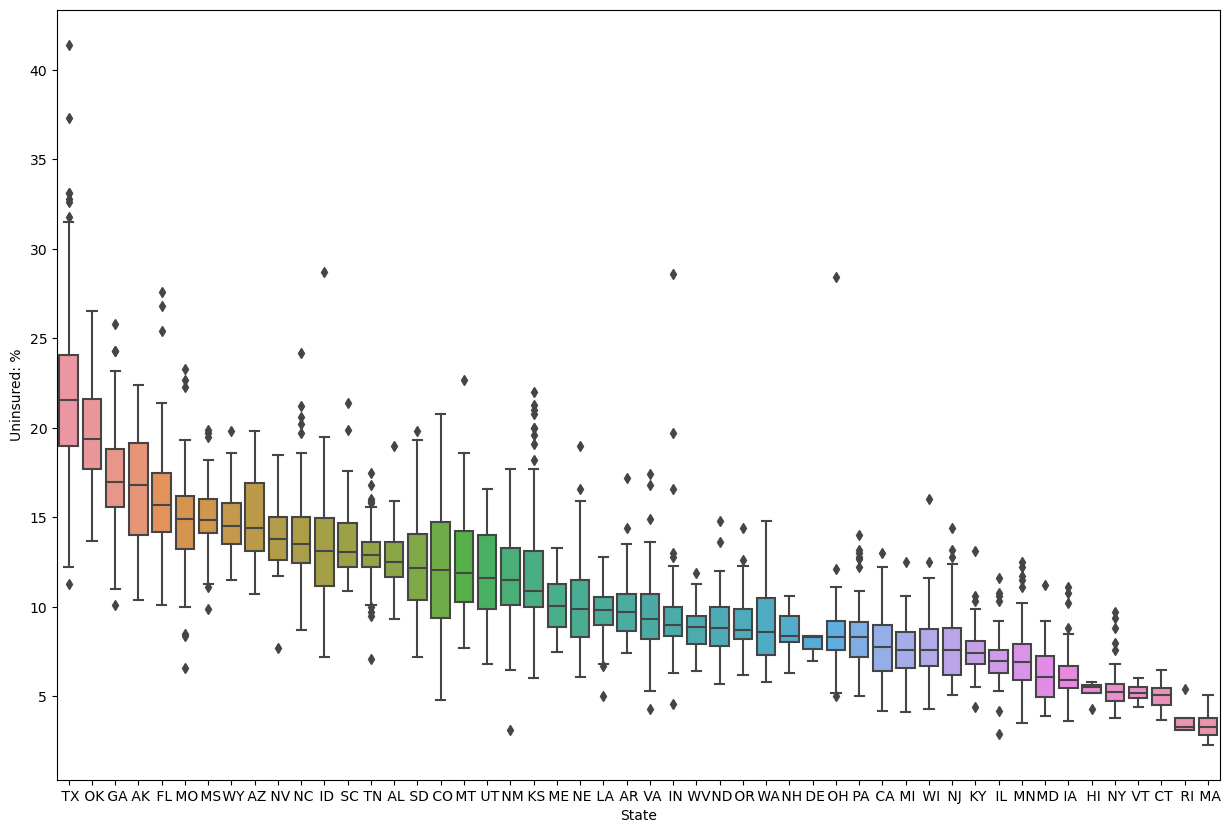

In [126]:
fig, ax = plt.subplots(figsize=(15, 10))  # generate a figure and return figure and axis handle

sns.boxplot(x=data2['State'],y=data2['Uninsured: %'], ax=ax, order=data_uni1.index)

In [127]:
#bring county data to view relationship with poverty and create ratio with area
pd.set_option('display.max_columns', None)
county = pd.read_csv('county.csv')
county.head()

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,age_under_5_2010,age_under_5_2017,age_under_18_2010,age_over_65_2010,age_over_65_2017,median_age_2017,female_2010,white_2010,black_2010,black_2017,native_2010,native_2017,asian_2010,asian_2017,pac_isl_2010,pac_isl_2017,other_single_race_2017,two_plus_races_2010,two_plus_races_2017,hispanic_2010,hispanic_2017,white_not_hispanic_2010,white_not_hispanic_2017,speak_english_only_2017,no_move_in_one_plus_year_2010,foreign_born_2010,foreign_spoken_at_home_2010,women_16_to_50_birth_rate_2017,hs_grad_2010,hs_grad_2016,hs_grad_2017,some_college_2016,some_college_2017,bachelors_2010,bachelors_2016,bachelors_2017,veterans_2010,veterans_2017,mean_work_travel_2010,mean_work_travel_2017,broadband_2017,computer_2017,housing_units_2010,homeownership_2010,housing_multi_unit_2010,median_val_owner_occupied_2010,households_2010,households_2017,persons_per_household_2010,persons_per_household_2017,per_capita_income_2010,per_capita_income_2017,metro_2013,median_household_income_2010,median_household_income_2016,median_household_income_2017,private_nonfarm_establishments_2009,private_nonfarm_employment_2009,percent_change_private_nonfarm_employment_2009,nonemployment_establishments_2009,firms_2007,black_owned_firms_2007,native_owned_firms_2007,asian_owned_firms_2007,pac_isl_owned_firms_2007,hispanic_owned_firms_2007,women_owned_firms_2007,manufacturer_shipments_2007,mercent_whole_sales_2007,sales_2007,sales_per_capita_2007,accommodation_food_service_2007,building_permits_2010,fed_spending_2009,area_2010,density_2010,smoking_ban_2010,poverty_2010,poverty_2016,poverty_2017,poverty_age_under_5_2017,poverty_age_under_18_2017,civilian_labor_force_2007,employed_2007,unemployed_2007,unemployment_rate_2007,civilian_labor_force_2008,employed_2008,unemployed_2008,unemployment_rate_2008,civilian_labor_force_2009,employed_2009,unemployed_2009,unemployment_rate_2009,civilian_labor_force_2010,employed_2010,unemployed_2010,unemployment_rate_2010,civilian_labor_force_2011,employed_2011,unemployed_2011,unemployment_rate_2011,civilian_labor_force_2012,employed_2012,unemployed_2012,unemployment_rate_2012,civilian_labor_force_2013,employed_2013,unemployed_2013,unemployment_rate_2013,civilian_labor_force_2014,employed_2014,unemployed_2014,unemployment_rate_2014,civilian_labor_force_2015,employed_2015,unemployed_2015,unemployment_rate_2015,civilian_labor_force_2016,employed_2016,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,age_over_18_2019,age_over_65_2019,age_over_85_2019,age_under_5_2019,asian_2019,avg_family_size_2019,bachelors_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_asian_or_pac_isl_2019,households_speak_limited_english_2019,households_speak_other_2019,households_speak_other_indo_euro_lang_2019,households_speak_spanish_2019,housing_mobile_homes_2019,housing_one_unit_structures_2019,housing_two_unit_structures_2019,hs_grad_2019,mean_household_income_2019,mean_work_travel_2019,median_age_2019,median_household_income_2019,median_individual_income_2019,median_individual_income_age_25plus_2019,native_2019,other_single_race_2019,pac_isl_2019,per_capita_income_2019,persons_per_household_2019,pop_2019,poverty_2019,poverty_65_and_over_2019,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,55504.0,6.6,5.7,26.8,12.0,14.3,37.8,51.3,78.5,17.7,9.55,0.4,0.15,0.9,0.47,NaN,0.04,0.65,1.6,0.84,2.4,2.67,77.2,75.42,96.2,86.3,2.0,3.7,7.4,85.3,87.6,87.7,28.7,29.1,21.7,24.6,25.0,5817,12.6

In [260]:
county1 = county.loc[:,['name','state','area_2010','poverty_2017','uninsured_2017','pop2017']]
county1['County'] = county1['name']
county1 = county1.iloc[:,[4,0,1,2,3,5]]
county1

,uninsured_2017,name,state,area_2010,poverty_2017,pop2017
0,8.8,Autauga County,Alabama,594.44,13.7,55504.0
1,10.8,Baldwin County,Alabama,1589.78,11.8,212628.0
2,12.3,Barbour County,Alabama,884.88,27.2,25270.0
3,8.1,Bibb County,Alabama,622.58,15.2,22668.0
4,11.0,Blount County,Alabama,644.78,15.6,58013.0
...,...,...,...,...,...,...
3137,12.4,Sweetwater County,Wyoming,10426.65,12.0,43534.0
3138,11.7,Teton County,Wyoming,3995.38,6.8,23265.0
3139,13.5,Uinta County,Wyoming,2081.26,14.9,20495.0
3140,16.8,Washakie County,Wyoming,2238.55,12.8,8064.0


In [261]:
states = pd.read_csv('US_states.csv')

table = pd.merge(county1,states,left_on='state',right_on='State')
table['name'] = table['name'] + ", " + table['Abbreviation']
table

,uninsured_2017,name,state,area_2010,poverty_2017,pop2017,State,Abbreviation
0,8.8,"Autauga County, AL",Alabama,594.44,13.7,55504.0,Alabama,AL
1,10.8,"Baldwin County, AL",Alabama,1589.78,11.8,212628.0,Alabama,AL
2,12.3,"Barbour County, AL",Alabama,884.88,27.2,25270.0,Alabama,AL
3,8.1,"Bibb County, AL",Alabama,622.58,15.2,22668.0,Alabama,AL
4,11.0,"Blount County, AL",Alabama,644.78,15.6,58013.0,Alabama,AL
...,...,...,...,...,...,...,...,...
3137,12.4,"Sweetwater County, WY",Wyoming,10426.65,12.0,43534.0,Wyoming,WY
3138,11.7,"Teton County, WY",Wyoming,3995.38,6.8,23265.0,Wyoming,WY
3139,13.5,"Uinta County, WY",Wyoming,2081.26,14.9,20495.0,Wyoming,WY
3140,16.8,"Washakie County, WY",Wyoming,2238.55,12.8,8064.0,Wyoming,WY


In [262]:
table1 = pd.merge(data2,table,left_on=['Name'],right_on=['name'])

table1

,ID,County,State_x,Name,Demographic Group: Number,Uninsured: Number,Uninsured: %,uninsured_2017,name,state,area_2010,poverty_2017,pop2017,State_y,Abbreviation
0,1001,Autauga,AL,"Autauga County, AL","46,423","4,902",10.6,8.8,"Autauga County, AL",Alabama,594.44,13.7,55504.0,Alabama,AL
1,1003,Baldwin,AL,"Baldwin County, AL","178,310","19,391",10.9,10.8,"Baldwin County, AL",Alabama,1589.78,11.8,212628.0,Alabama,AL
2,1005,Barbour,AL,"Barbour County, AL","16,265","2,337",14.4,12.3,"Barbour County, AL",Alabama,884.88,27.2,25270.0,Alabama,AL
3,1007,Bibb,AL,"Bibb County, AL","16,121","2,097",13.0,8.1,"Bibb County, AL",Alabama,622.58,15.2,22668.0,Alabama,AL
4,1009,Blount,AL,"Blount County, AL","46,444","6,156",13.3,11.0,"Blount County, AL",Alabama,644.78,15.6,58013.0,Alabama,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,56037,Sweetwater,WY,"Sweetwater County, WY","36,242","5,003",13.8,12.4,"Sweetwater County, WY",Wyoming,10426.65,12.0,43534.0,Wyoming,WY
3122,56039,Teton,WY,"Teton County, WY","19,893","2,886",14.5,11.7,"Teton County, WY",Wyoming,3995.38,6.8,23265.0,Wyoming,WY
3123,56041,Uinta,WY,"Uinta County, WY","16,872","2,344",13.9,13.5,"Uinta County, WY",Wyoming,2081.26,14.9,20495.0,Wyoming,WY
3124,56043,Washakie,WY,"Washakie County, WY","5,816",924,15.9,16.8,"Washakie County, WY",Wyoming,2238.55,12.8,8064.0,Wyoming,WY


<AxesSubplot:xlabel='Uninsured: %', ylabel='poverty_2017'>

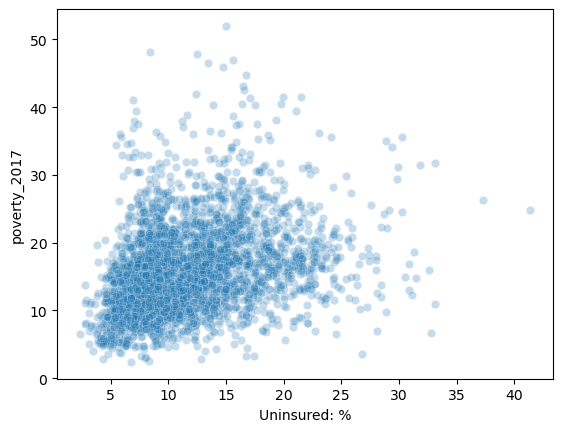

In [263]:
#relationship between proverty and uninsured
sns.scatterplot(x='Uninsured: %',y='poverty_2017',data=table1,alpha=0.25)

In [264]:
print(str('Simple correlation: '))
print(table1['Uninsured: %'].corr(table1['poverty_2017']))

table1['UninsuredSq'] = table1['Uninsured: %']**(2)
table1['UninsuredSqRt'] = table1['Uninsured: %']**(1/2)
table1['UninsuredLog'] = np.log(table1['Uninsured: %'])
table1['PovertyLog'] = np.log(table1['poverty_2017'])

print(str('\nCorrelation squaring Uninsured: '))
print(table1['UninsuredSq'].corr(table1['poverty_2017']))

print(str('\nCorrelation squaring-rotting Uninsured: '))
print(table1['UninsuredSqRt'].corr(table1['poverty_2017']))

print(str('\nCorrelation logging Uninsured: '))
print(table1['UninsuredLog'].corr(table1['poverty_2017']))

print(str('\nCorrelation logging Uninsured and Poverty: '))
print(table1['UninsuredLog'].corr(table1['PovertyLog']))

#looks like a very subtle relationship between uninsured and poverty, not too strong or super noticeable

Simple correlation: 
0.3118202606790775

Correlation squaring Uninsured: 
0.26478175769977835

Correlation squaring-rotting Uninsured: 
0.33027806084976036

Correlation logging Uninsured: 
0.3434611673834584

Correlation logging Uninsured and Poverty: 
0.3704050576219647


In [278]:
#Create ratio 'UninsDens' for uninsured density (# of uninsured / square mile of county), 
#maybe it helps to know concentration in this fashion

unins = round((table1['uninsured_2017']/100) * table1['pop2017'],0)
table1['UninsDens'] = unins / table1['area_2010']
table1

,ID,County,State_x,Name,Demographic Group: Number,Uninsured: Number,Uninsured: %,uninsured_2017,name,state,area_2010,poverty_2017,pop2017,State_y,Abbreviation,UninsuredSq,UninsuredSqRt,UninsuredLog,PovertyLog,UninsDens
0,1001,Autauga,AL,"Autauga County, AL","46,423","4,902",10.6,8.8,"Autauga County, AL",Alabama,594.44,13.7,55504.0,Alabama,AL,112.36,3.255764,2.360854,2.617396,8.216136
1,1003,Baldwin,AL,"Baldwin County, AL","178,310","19,391",10.9,10.8,"Baldwin County, AL",Alabama,1589.78,11.8,212628.0,Alabama,AL,118.81,3.301515,2.388763,2.468100,14.444766
2,1005,Barbour,AL,"Barbour County, AL","16,265","2,337",14.4,12.3,"Barbour County, AL",Alabama,884.88,27.2,25270.0,Alabama,AL,207.36,3.794733,2.667228,3.303217,3.512341
3,1007,Bibb,AL,"Bibb County, AL","16,121","2,097",13.0,8.1,"Bibb County, AL",Alabama,622.58,15.2,22668.0,Alabama,AL,169.00,3.605551,2.564949,2.721295,2.949019
4,1009,Blount,AL,"Blount County, AL","46,444","6,156",13.3,11.0,"Blount County, AL",Alabama,644.78,15.6,58013.0,Alabama,AL,176.89,3.646917,2.587764,2.747271,9.896399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,56037,Sweetwater,WY,"Sweetwater County, WY","36,242","5,003",13.8,12.4,"Sweetwater County, WY",Wyoming,10426.65,12.0,43534.0,Wyoming,WY,190.44,3.714835,2.624669,2.484907,0.517712
3122,56039,Teton,WY,"Teton County, WY","19,893","2,886",14.5,11.7,"Teton County, WY",Wyoming,3995.38,6.8,23265.0,Wyoming,WY,210.25,3.807887,2.674149,1.916923,0.681287
3123,56041,Uinta,WY,"Uinta County, WY","16,872","2,344",13.9,13.5,"Uinta County, WY",Wyoming,2081.26,14.9,20495.0,Wyoming,WY,193.21,3.728270,2.631889,2.701361,1.329483
3124,56043,Washakie,WY,"Washakie County, WY","5,816",924,15.9,16.8,"Washakie County, WY",Wyoming,2238.55,12.8,8064.0,Wyoming,WY,252.81,3.987480,2.766319,2.549445,0.605303


<AxesSubplot:xlabel='State_x', ylabel='UninsDens'>

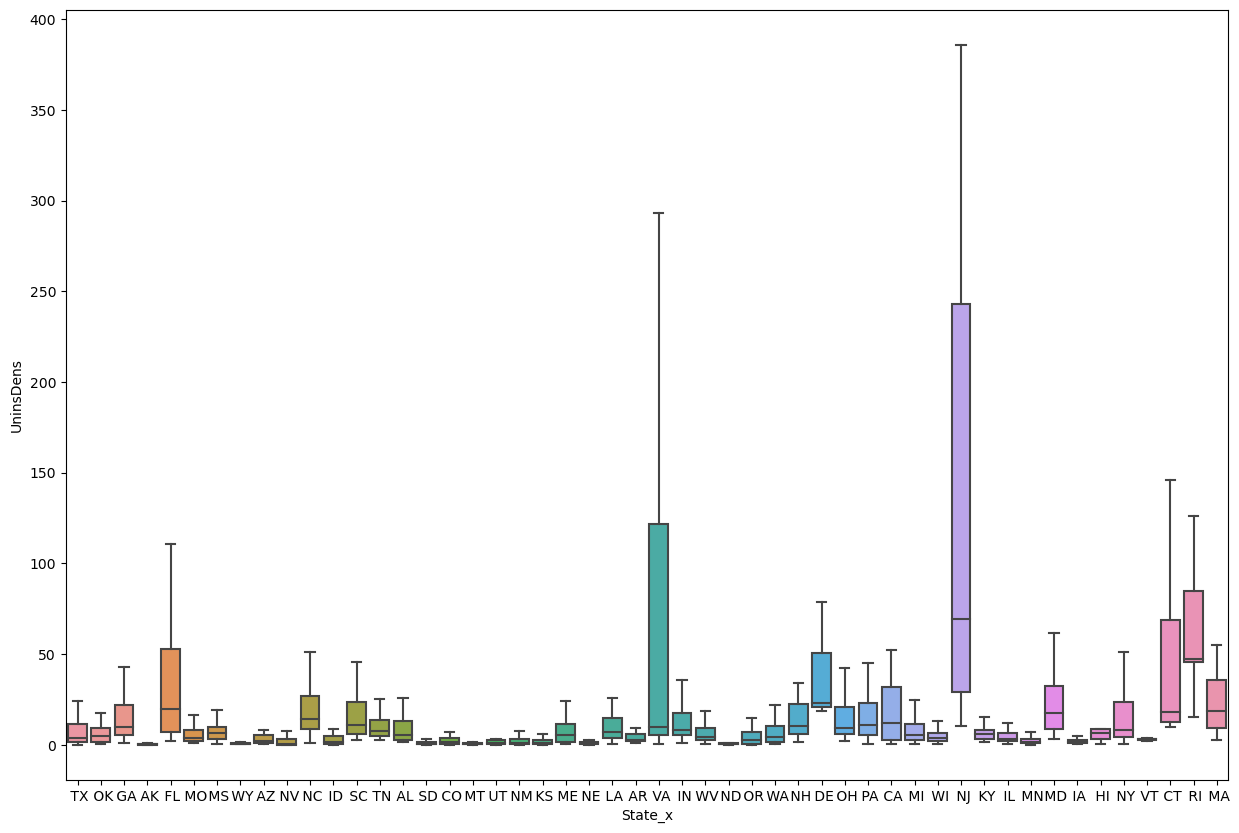

In [281]:
#using same sorting as before, let's see if plotting by density give us similar pattern
fig, ax = plt.subplots(figsize=(15, 10))  # generate a figure and return figure and axis handle

sns.boxplot(x=table1['State_x'],y=table1['UninsDens'], ax=ax, order=data_uni1.index, showfliers=False)

#Definitely not following previous pattern, we need to sort graph...

In [282]:
data_uni = data2.groupby('State')['Uninsured: %'].median()
data_uni1 = data_uni.sort_values(ascending=False)
data_uni1

table_dens = table1.groupby('State_x')['UninsDens'].median()
table_dens1 = table_dens.sort_values(ascending=False)
table_dens1

State_x
 NJ    69.420147
 RI    47.280008
 DE    22.926405
 FL    19.466988
 MA    18.834810
 CT    18.175114
 MD    17.307866
 NC    14.399219
 CA    11.758240
 SC    10.910880
 PA    10.851844
 NH    10.159499
 VA     9.888053
 GA     9.552998
 OH     9.082928
 NY     7.931046
 IN     7.923947
 TN     7.738947
 LA     6.870229
 HI     6.634299
 MS     6.273556
 KY     5.773779
 ME     5.331967
 MI     5.112582
 AL     5.104512
 OK     4.641172
 WA     4.037783
 WV     4.001922
 TX     3.946537
 MO     3.742079
 WI     3.500025
 IL     3.054780
 VT     3.009894
 AR     2.728000
 OR     2.406365
 AZ     1.821045
 MN     1.700007
 IA     1.541565
 ID     1.466600
 CO     1.389566
 NM     1.003840
 UT     0.920718
 KS     0.821582
 NE     0.717305
 SD     0.579840
 WY     0.557637
 MT     0.322508
 NV     0.308768
 ND     0.268899
 AK     0.169196
Name: UninsDens, dtype: float64

<AxesSubplot:xlabel='State_x', ylabel='UninsDens'>

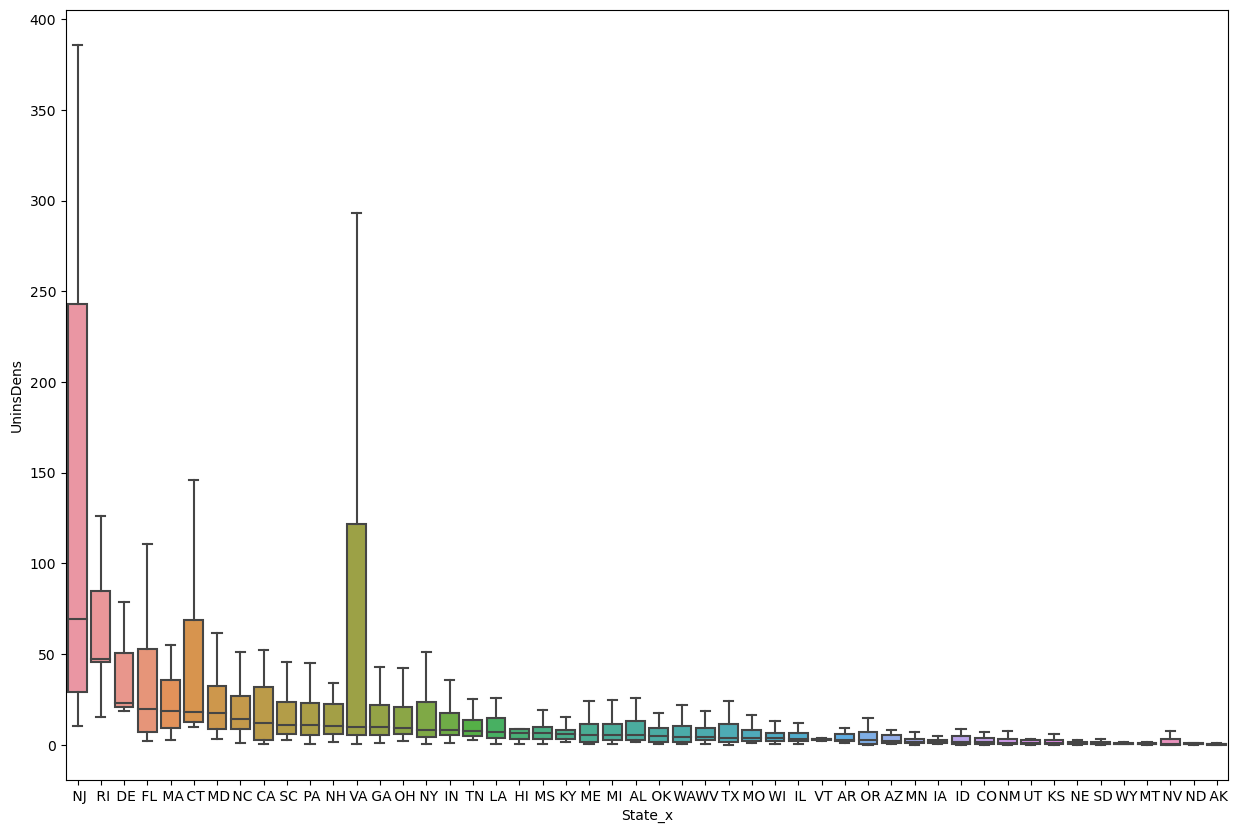

In [283]:
#using now sorting based on density of uninsured by county area, we see which states might give us better return per investment (potentially?)
fig, ax = plt.subplots(figsize=(15, 10))  # generate a figure and return figure and axis handle

sns.boxplot(x=table1['State_x'],y=table1['UninsDens'], ax=ax, order=table_dens1.index, showfliers=False)

In [300]:
#let's compare ininsured density stats for counties in TX and NJ (worst in each graphs)
tableTX = table1[table1['state']=='Texas']
tableNJ = table1[table1['state']=='New Jersey']

print('For Texas, we have the following:')
print(tableTX['UninsDens'].describe())

print('\nFor New Jersey, we have the following:')
print(tableNJ['UninsDens'].describe())

print('\nNew Jersey has a median of ~69 uninsured per square mile in their counties vs 4 in Texas.')

For Texas, we have the following:
count    254.000000
mean      20.575455
std       67.105738
min        0.033428
25%        1.294197
50%        3.946537
75%       11.200480
max      664.093058
Name: UninsDens, dtype: float64

For New Jersey, we have the following:
count      21.000000
mean      282.955320
std       544.393343
min        10.230938
25%        29.210599
50%        69.420147
75%       242.818297
max      2425.763152
Name: UninsDens, dtype: float64

New Jersey has a median of ~69 uninsured per square mile in their counties vs 4 in Texas.
